# Графические возможности библиотеки Plotly

In [1]:
import plotly
import plotly.express as px
import pandas as pd

In [2]:
print (plotly.__version__)

5.9.0


###  Линейный график line()
    * data_frame — DataFrame, по которому строится график;
    * x — признак по оси абсцисс;
    * y — признак по оси ординат;
    * height — высота графика;
    * width — ширина графика;
    * title — название графика.

In [3]:
covid_df = pd.read_csv('data/covid_df.csv')
display(covid_df.head())

Unnamed: 0        date      country  confirmed  deaths  recovered  active  \
0           0  2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1           1  2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2           2  2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3           3  2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4           4  2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0

In [4]:
"""
график роста зафиксированного числа случаев заражения (confirmed),
смертей (deaths),
выздоровлений (recovered) и
активных случаев (active) за всё время.
Для этого просуммируем статистику по дням и передадим полученный DataFrame в метод line().
"""
line_data = covid_df.groupby('date', as_index=False).sum()

<ipython-input-4-9e91a02cde81>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  line_data = covid_df.groupby('date', as_index=False).sum()


In [5]:
!pip install nbformat

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import plotly.io as pio

pio.renderers.default = "svg"

In [ ]:
# import plotly.express as px
# fig = px.scatter(px.data.iris(), x="sepal_width", y="sepal_length", color="species")
# fig.show("png")

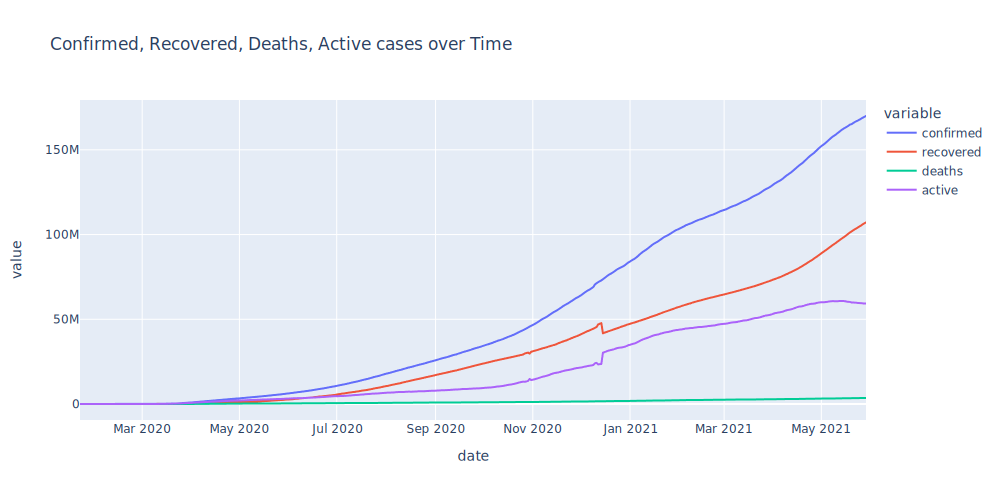

In [7]:
fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', # ось абцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], # ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' # заголовок
)


fig.show("svg")

### В результате мы получаем график, который позволяет:

* получать значения признака в отдельных точках в интерактивном режиме (наведите мышку на точку на графике, чтобы посмотреть информацию о её координатах);
* регулировать отображения конкретных признаков с помощью легенды (отключать и включать данные признаки без изменения кода);
* увеличивать фрагменты, выделяя их мышкой или приближая колёсиком мышки;
* сохранять полученный график в формате PNG напрямую из Jupyter Notebook (нажмите на иконку фотоаппарата рядом с графиком).

## Столбчатая диаграмма bar()
    * color — группирующий признак, в соответствии с которым будут раскрашены столбцы диаграммы;
    * text — текст, который будет подписан на столбцах диаграммы;
    * orientation — ориентация графика ('v' — вертикальная, 'h' — горизонтальная).

In [7]:
"""
ТОП-10 стран по среднему проценту выздоравливающих пациентов (recover_rate).
"""

bar_data = covid_df.groupby(
    by='country',
    as_index=False
)['recover_rate'].mean().round(2).nlargest(10, columns=['recover_rate'])


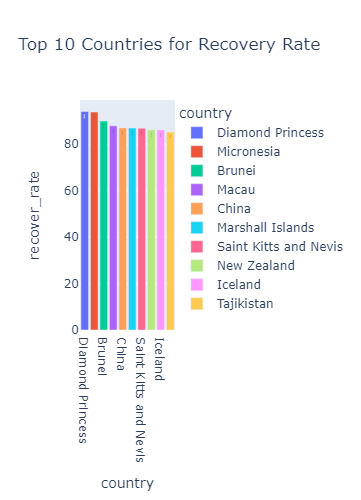

In [8]:
# Строим график
fig = px.bar(
    data_frame=bar_data, # DataFrame
    x='country', #ось x
    y='recover_rate', # ось y
    color='country', # расцветка в зависимости от стран
    text='recover_rate', # текст на столбцах
    orientation='v', #ориентация графика
    height=500,
    width=1000,
    title='Top 10 Countries for Recovery Rate' # заголовок
)

# отображаем
fig.show()

## Древесная, иерархическая диаграмма treemap()
    * data_frame — DataFrame, по которому строится график;
    * path — категориальные признаки (их может быть несколько), в разрезе которых строится диаграмма;
    * values — показатель, по которому рассчитываются размеры прямоугольников.

In [9]:
"""
Построим иерархическую диаграмму
для среднего ежедневного показателя выздоровевших пациентов (daily_recovered)
во всех странах.
"""

#считаем среднее ежедневно фикс-е количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)['daily_recovered'].mean()

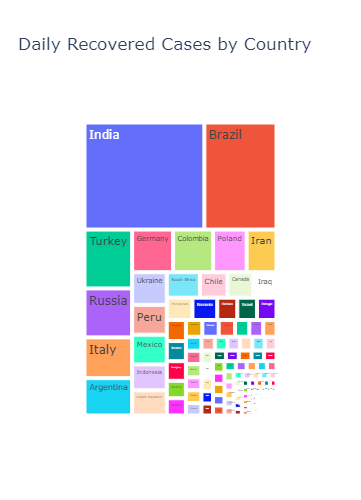

In [10]:
# Строим график
fig = px.treemap(
    data_frame=treemap_data,
    path=['country'],
    values='daily_recovered', # параметр, который сравнивается
    height=500,
    width=1000,
    title='Daily Recovered Cases by Country'
)

fig.show()

# Анимация графиков во времени

## Тепловая картограмма choropleth()
    * data_frame — DataFrame, по которому строится график;
    * locations — название столбца, из которого берутся локации (столбец со странами или регионами);
    * locationmode — режим геопривязки; определяет, как будет производиться сопоставление данных с картой в Plotly (возможно сопоставление по названию страны, "country_name", или по её трёхзначному шифру, согласно международному стандарту ISO-3);
    * range_color — диапазон изменения цвета;
    * animation_frame — анимирующий признак, изменяя который, мы получаем визуализацию во времени;
    * color_continuous_scale — цветовая палитра.

In [11]:
"""
построим фоновую картограмму,
которая покажет распространение (confirmed) коронавируса в мире во времени;

для правильного отображения на анимационном бегунке даты в таблице covid_df
необходимо перевести обратно в строковый тип данных.
"""

# проеобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

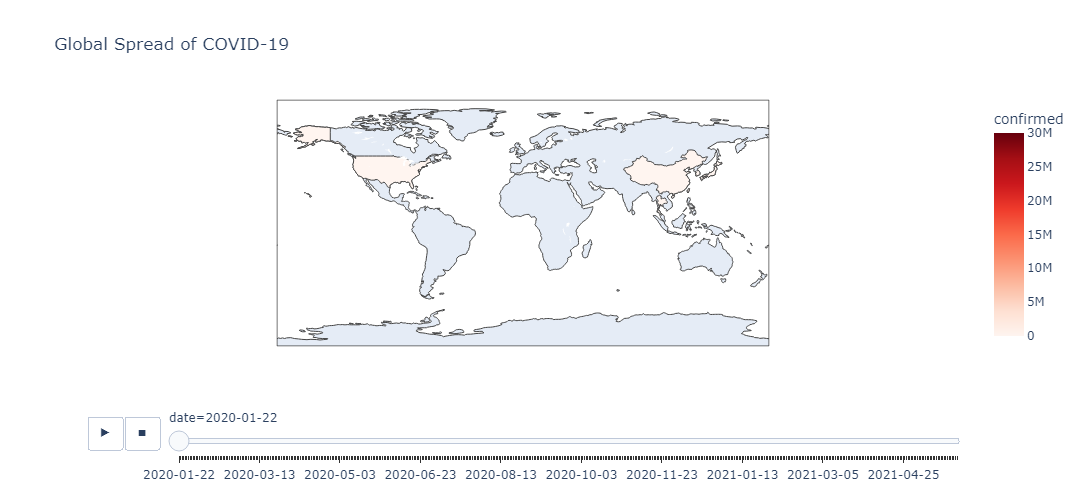

In [12]:
# строим график
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='country', # столбец с локациями
    locationmode='country names', # режим сопоставления локаций с базовой Plotly
    color='confirmed', # от чего зависит цвет
    animation_frame='date', # анимационный бегунок
    range_color=[0, 30e6], # диапазон цвета
    title='Global Spread of COVID-19',
    height=500,
    width=800,
    color_continuous_scale='Reds'
)

fig.show()

# Трехмерная визуализация

## Диаграмма рассеяния scatter_3d()
    * z — параметр по оси аппликат;
    * log_x — установка логарифмического масштаба по оси x;
    * log_y — установка логарифмического масштаба по оси y.

In [13]:
"""
Построим 3D-диаграмму рассеяния, которая покажет,
как число ежедневно обнаруживаемых случаев и
число ежедневных смертей влияют
на желание людей вакцинироваться.

Для того чтобы нам было проще рассматривать диаграмму
(точки будут более сгруппированными),
построим её в логарифмическом масштабе
по осям абсцисс и ординат.
"""

# фильтруем таблицу по странам
countries = ['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

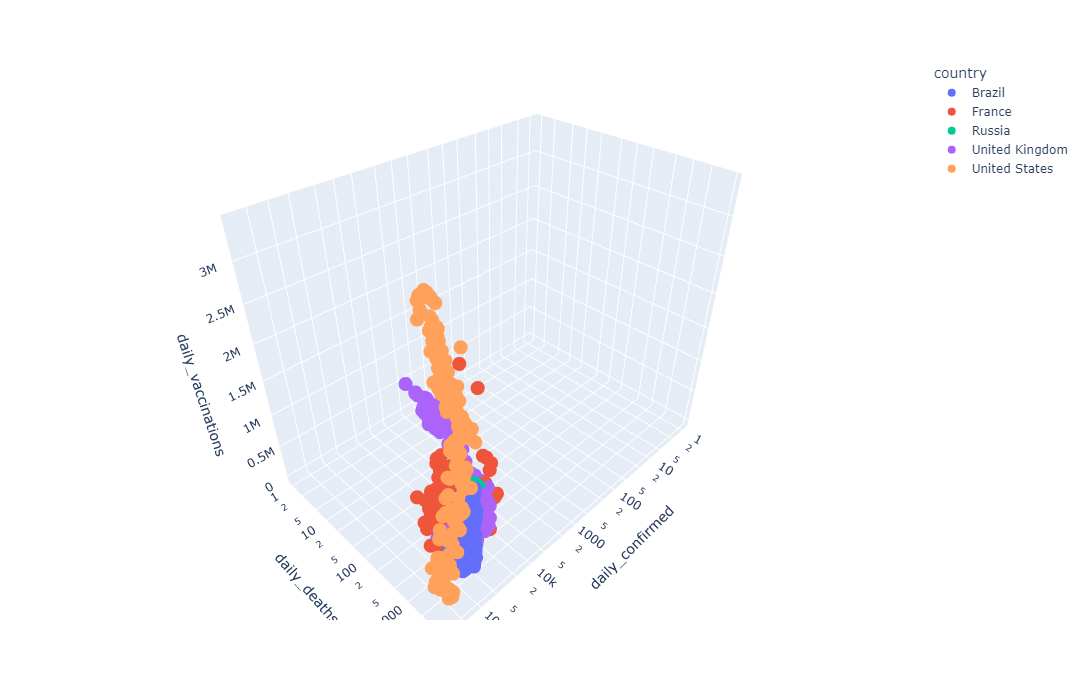

In [15]:
# build graphs
fig = px.scatter_3d(
    data_frame=scatter_data,
    x= 'daily_confirmed',
    y = 'daily_deaths',
    z = 'daily_vaccinations',
    color='country',
    log_x=True,
    log_y=True,
    width=1000,
    height=700
)

fig.show()

In [17]:
"""
Сохранение графика PLOTLY (заранее нужно создать папку)
"""
fig.write_html("plotly/scatter_3d.html")

### Задание 7.5

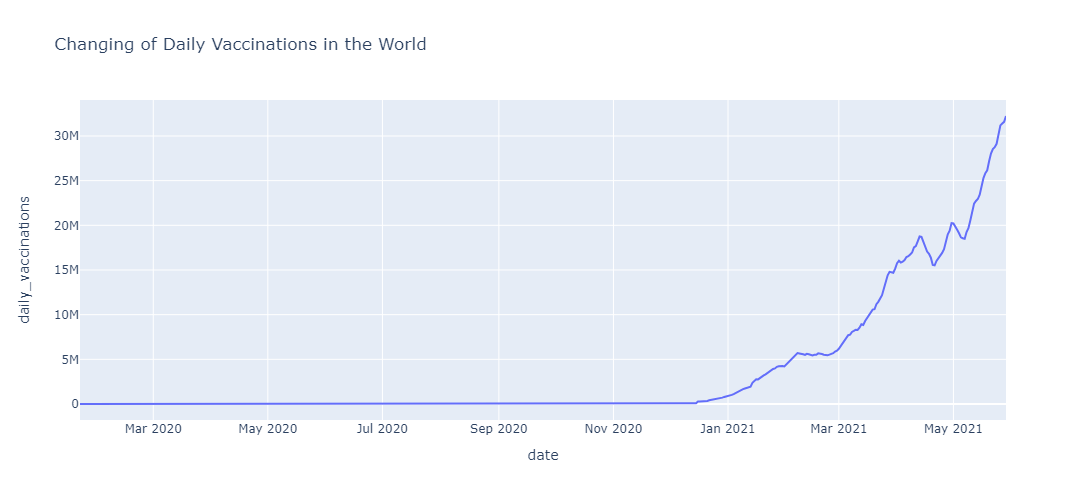

In [20]:
"""
Постройте линейный график,
который отображает,
как изменялось ежедневное количество вакцинированных
(daily_vaccinations) в мире во времени.

Из графика найдите:
чему равно количество вакцинированных (в миллионах)
28 февраля 2021 года (2021-02-28).
Ответ округлите до целого числа.
"""

line_data = covid_df.groupby('date', as_index=False).sum()

fig = px.line(
    data_frame=line_data,
    x='date',
    y='daily_vaccinations',
    height=500,
    width=1000,
    title='Changing of Daily Vaccinations in the World'
)

fig.show()

# 6 (5.97)

### Задание 7.6

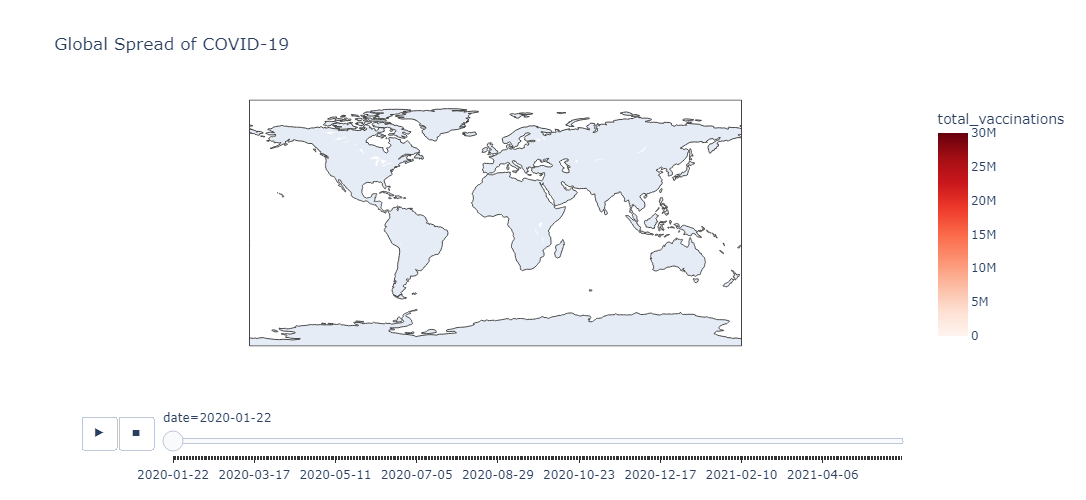

In [21]:
"""
Постройте анимированную тепловую картограмму
для числа поставленных вакцин во всём мире (total_vaccinations).
На полученной карте найдите,
чему равно количество вакцинированных в Японии (Japan) на 24 марта 2021 года (2021-03-24).

Ответ приведите в тысячах (без нулей) и округлите до целого числа.
"""
# проеобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

# строим график
fig = px.choropleth(
    data_frame=choropleth_data,
    locations='country', # столбец с локациями
    locationmode='country names', # режим сопоставления локаций с базовой Plotly
    color='total_vaccinations', # от чего зависит цвет
    animation_frame='date', # анимационный бегунок
    range_color=[0, 30e6], # диапазон цвета
    title='Global Spread of COVID-19',
    height=500,
    width=800,
    color_continuous_scale='Reds'
)

fig.show()

# 741 тысяча